In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

In [5]:
print("Shape:", df.shape)
df.head()

Shape: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

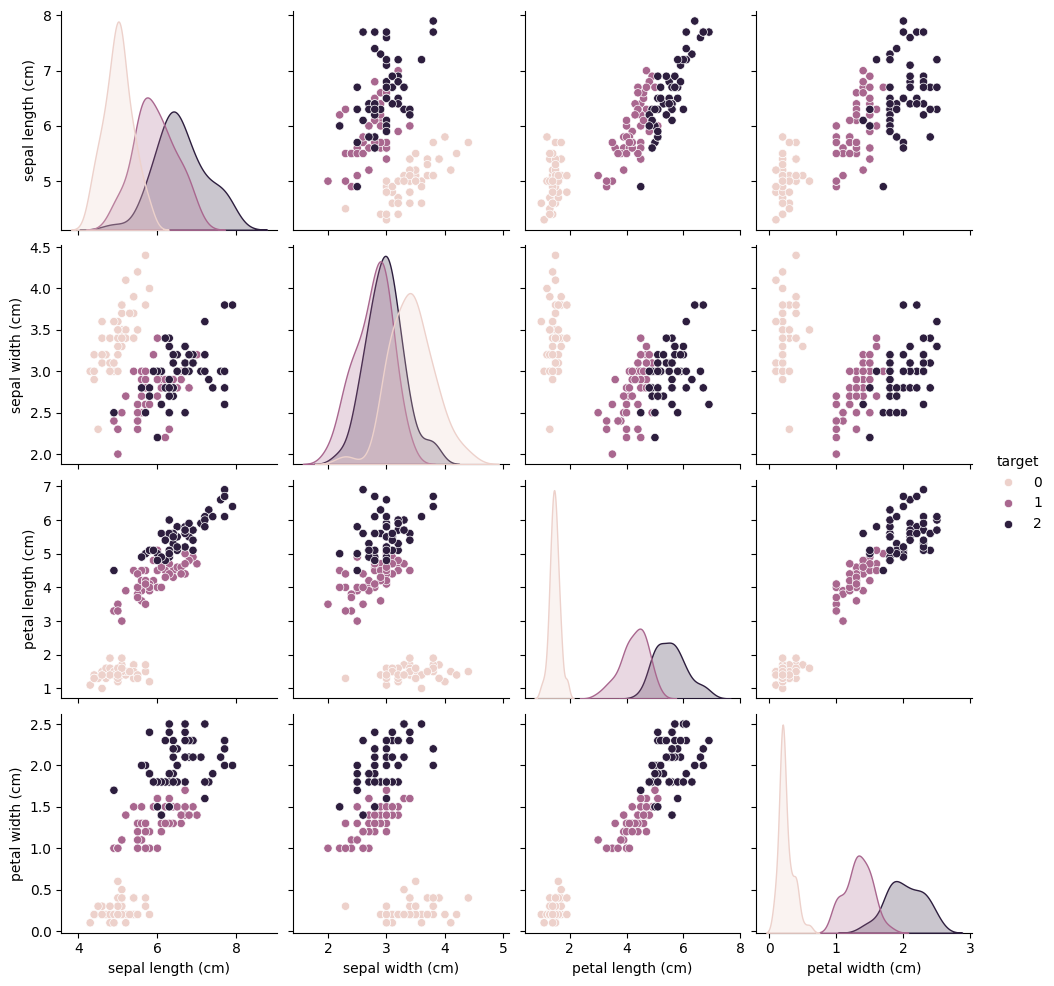

In [7]:
sns.pairplot(df, hue="target", vars=iris.feature_names)
plt.show()

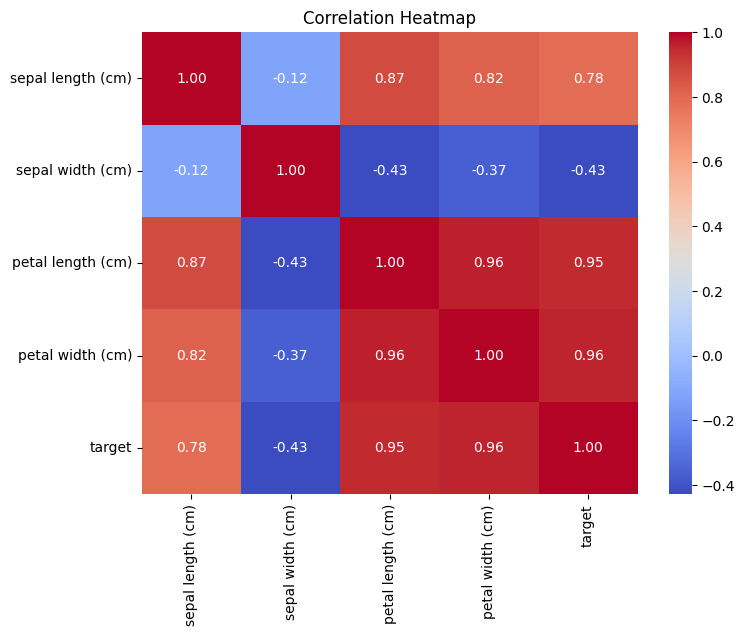

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [9]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 120
Test size: 30


In [11]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [12]:
print(f"KNN Accuracy (k={k}):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

KNN Accuracy (k=5): 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



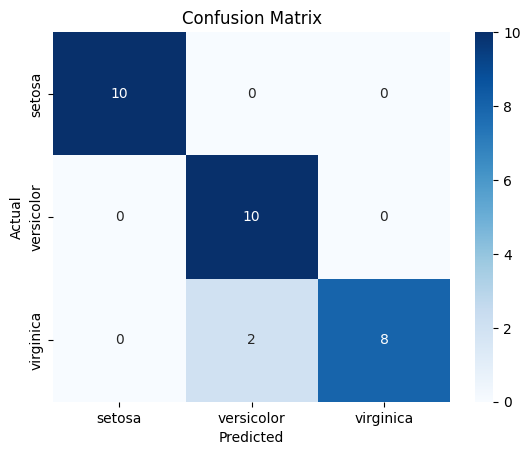

In [13]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
k_values = range(1, 21)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

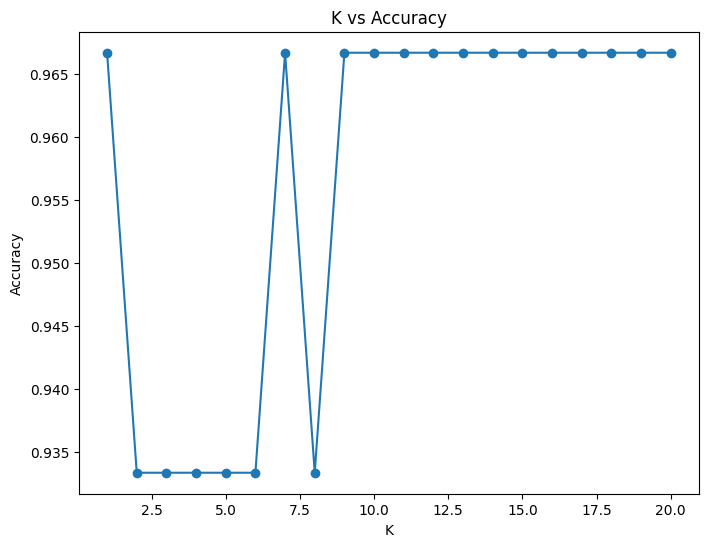

In [15]:
plt.figure(figsize=(8,6))
plt.plot(k_values, scores, marker='o')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.show()

In [16]:
from matplotlib.colors import ListedColormap

In [17]:
X_2d = df[["sepal length (cm)", "sepal width (cm)"]].values
y_2d = df["target"]

In [18]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2d, y_2d, test_size=0.2, random_state=42, stratify=y_2d)
scaler2 = StandardScaler()
X_train2 = scaler2.fit_transform(X_train2)
X_test2 = scaler2.transform(X_test2)

In [19]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train2, y_train2)

KNeighborsClassifier()

In [20]:
x_min, x_max = X_train2[:, 0].min()-1, X_train2[:, 0].max()+1
y_min, y_max = X_train2[:, 1].min()-1, X_train2[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [21]:
Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

<Figure size 800x600 with 0 Axes>

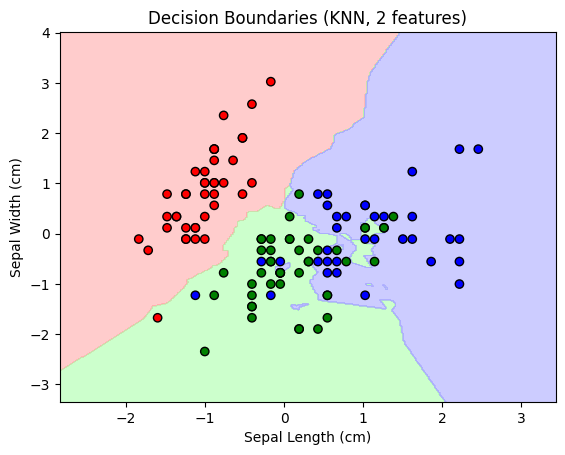

In [22]:
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_train2, edgecolor='k', cmap=ListedColormap(cmap_bold))
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Decision Boundaries (KNN, 2 features)")
plt.show()

In [23]:
print("\nSome Observations:")
print("1. KNN works by checking the majority class of nearest neighbors.")
print("2. Normalization is important because KNN relies on distance metrics.")
print("3. Choosing K is critical: small K may overfit, large K may underfit.")
print("4. Accuracy varies with K; best K often found via cross-validation.")
print("5. Decision boundary visualization helps understand model behavior.")


Some Observations:
1. KNN works by checking the majority class of nearest neighbors.
2. Normalization is important because KNN relies on distance metrics.
3. Choosing K is critical: small K may overfit, large K may underfit.
4. Accuracy varies with K; best K often found via cross-validation.
5. Decision boundary visualization helps understand model behavior.
